# Importing Libraries and Reading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('CarPrice.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.shape

(205, 26)

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Cleaning

In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
# Dropping non-numeric and irrelevant columns

In [12]:
df.drop(columns = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                  'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], inplace = True)

In [13]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Exploration

In [14]:
# The correlation between the price and all the other columns within the data

In [15]:
df.corr()['price']

wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

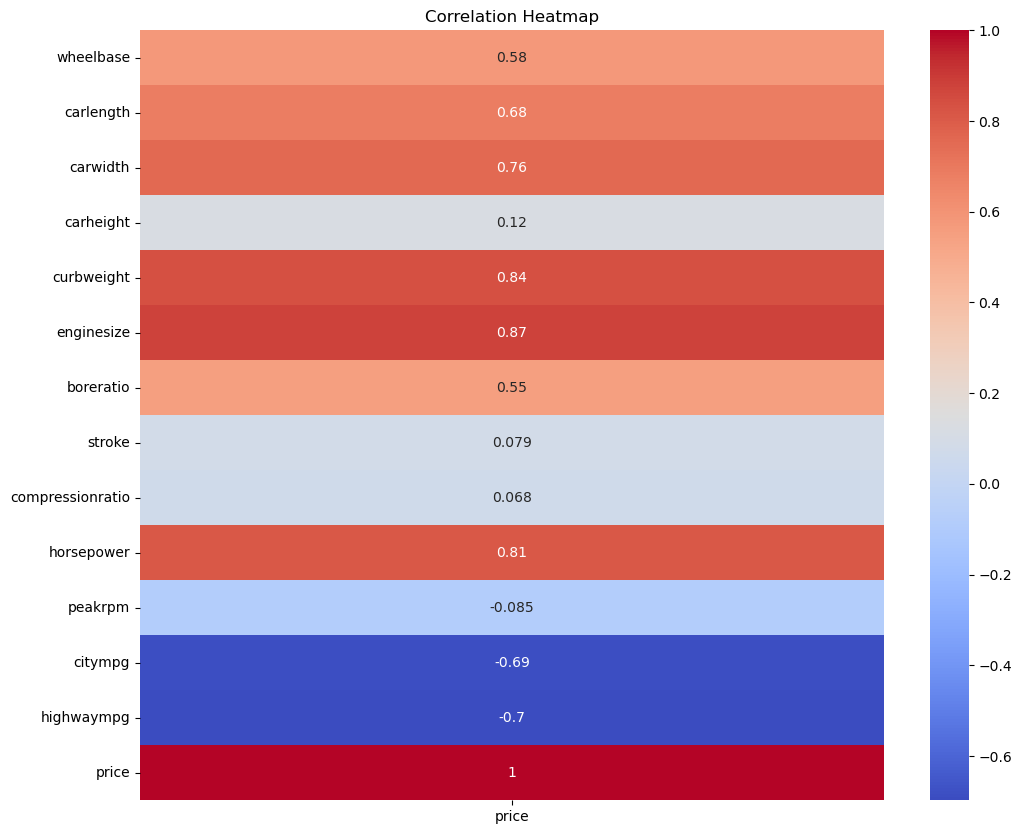

In [16]:
correlation_matrix = df.corr()[['price']]
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Strongest correlations between price with enginesize, curbweight and horsepower

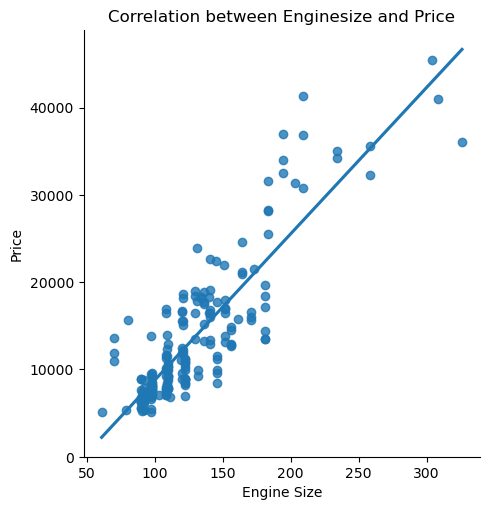

In [18]:
sns.lmplot(x = 'enginesize', y = 'price', data = df, fit_reg = True, ci = None)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Correlation between Enginesize and Price')
plt.ylim(0,)
plt.show()

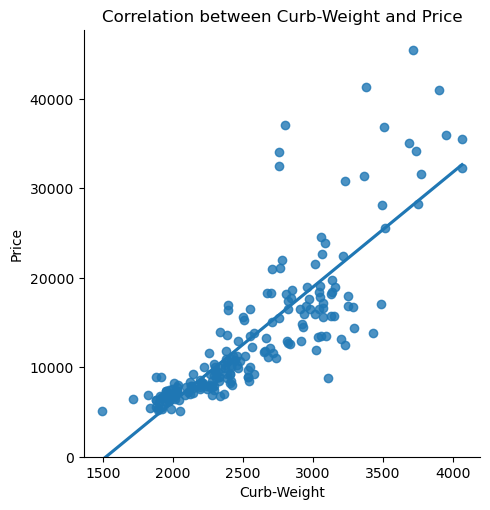

In [19]:
sns.lmplot(x = 'curbweight', y = 'price', data = df, fit_reg = True, ci = None)
plt.xlabel('Curb-Weight')
plt.ylabel('Price')
plt.title('Correlation between Curb-Weight and Price')
plt.ylim(0,)
plt.show()

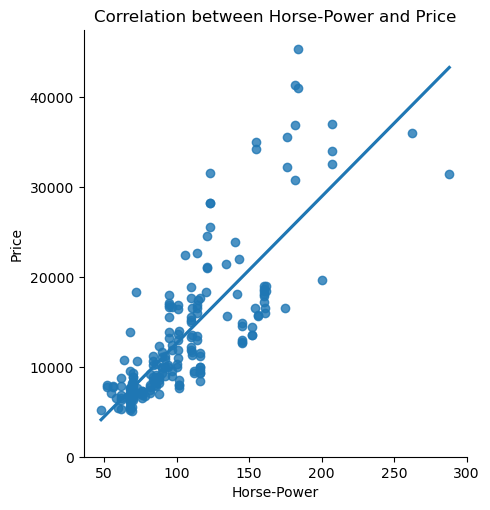

In [20]:
sns.lmplot(x = 'horsepower', y = 'price', data = df, fit_reg = True, ci = None)
plt.xlabel('Horse-Power')
plt.ylabel('Price')
plt.title('Correlation between Horse-Power and Price')
plt.ylim(0,)
plt.show()

In [21]:
# Showing how balanced the target is

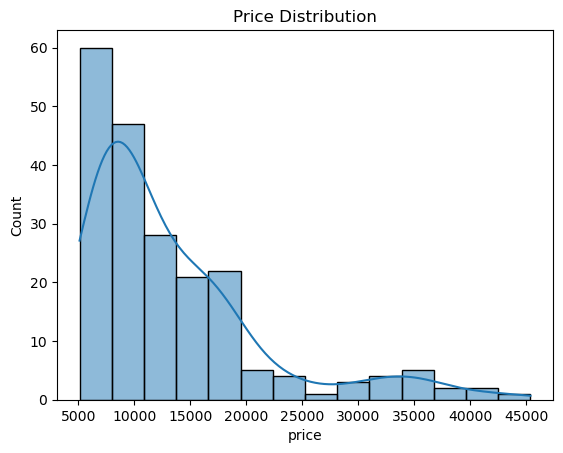

In [22]:
sns.histplot(data = df['price'], multiple = 'stack', kde = True)
plt.title('Price Distribution')
plt.show()

# Developing the Model - Linear Regression

In [23]:
# Developing a model that predicts the price of a car based on its enginesize, curb-weight and horsepower

In [24]:
# Creating a linear regression object, with enginesize being the predictor variable and price the response variable

In [25]:
lm = LinearRegression()

In [26]:
# Fitting the linear model

In [27]:
lm.fit(df[['enginesize']], df[['price']])

LinearRegression()

In [28]:
# Output prediction Yhat

In [29]:
Yhat = lm.predict(df[['enginesize']])
Yhat[0:10]

array([[13795.34859997],
       [13795.34859997],
       [17484.71376062],
       [10273.68185571],
       [14801.53909833],
       [14801.53909833],
       [14801.53909833],
       [14801.53909833],
       [13963.04701636],
       [13963.04701636]])

In [30]:
print('The intercept value of the model is:', lm.intercept_)

The intercept value of the model is: [-8005.44553115]


In [31]:
print('The slope  of the model is:', lm.coef_)

The slope  of the model is: [[167.69841639]]


In [32]:
# The final linear model, or the equation of the predicted line is;

In [33]:
Yhat = 167.70*df['enginesize']-8005.45
Price = 167.70*df['enginesize']-8005.45

In [34]:
# Creating a linear regression object, with curb-weight being the predictor variable and price the response variable

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(df[['curbweight']], df[['price']])

LinearRegression()

In [37]:
Yhat1 = lm.predict(df[['curbweight']])
Yhat1[0:10]

array([[13179.74528473],
       [13179.74528473],
       [16704.19273681],
       [10475.53287605],
       [16717.00890936],
       [12654.28221006],
       [16973.33236042],
       [18383.11134125],
       [20074.84611825],
       [19651.912424  ]])

In [38]:
print('The intercept value of the model is:', lm.intercept_)

The intercept value of the model is: [-19475.86238032]


In [39]:
print('The slope  of the model is:', lm.coef_)

The slope  of the model is: [[12.81617255]]


In [40]:
Yhat1 = 12.82*df['curbweight']-19475.86
Price_curbweight = 12.82*df['curbweight']-19475.86

In [41]:
# Creating a linear regression object, with horsepower being the predictor variable and price the response variable

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(df[['horsepower']], df[['price']])

LinearRegression()

In [44]:
Yhat2 = lm.predict(df[['horsepower']])
Yhat2[0:10]

array([[14400.43827331],
       [14400.43827331],
       [21420.749895  ],
       [12931.07072458],
       [15053.49051719],
       [14237.17521234],
       [14237.17521234],
       [14237.17521234],
       [19135.06704143],
       [22400.32826082]])

In [45]:
print('The intercept value of the model is:', lm.intercept_)

The intercept value of the model is: [-3721.76149432]


In [46]:
print('The slope  of the model is:', lm.coef_)

The slope  of the model is: [[163.26306097]]


In [47]:
Yhat2 = 163.26*df['horsepower']-3721.76
Price_horsepower = 163.26*df['horsepower']-3721.76

# Developing the Model - Multiple Linear Regression 

In [48]:
# Using multuple variables within the model to predict car prices

In [49]:
Z = df[['enginesize', 'curbweight', 'horsepower']]

In [50]:
lm.fit(Z, df['price'])

LinearRegression()

In [51]:
print('The intercept value of the model is:', lm.intercept_)

The intercept value of the model is: -13463.788694053808


In [52]:
print('The slope  of the model is:', lm.coef_)

The slope  of the model is: [84.87963009  4.26255151 48.74726003]


Therefore Price_MLR = 84.88*['enginesize']+4.26*['curbweight']+48.75*['horsepower']-13463.79

In [53]:
# Visualising the Multiple Linear Regression Model

In [54]:
Y_hat3 = lm.predict(Z)

/var/folders/z_/pzpmly8j3tj38k0q6vtpf_yw0000gn/T/ipykernel_32605/4281618535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], hist = False, label = 'Actual Value')
/var/folders/z_/pzpmly8j3tj38k0q6vtpf_yw0000gn/T/ipykernel_32605/4281618535.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

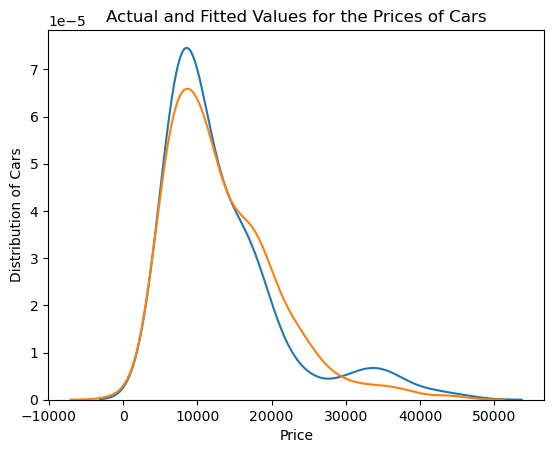

In [55]:
sns.distplot(df['price'], hist = False, label = 'Actual Value')
sns.distplot(Y_hat3, hist = False, label = 'Fitted Values')

plt.xlabel('Price')
plt.ylabel('Distribution of Cars')
plt.title('Actual and Fitted Values for the Prices of Cars')
plt.show()

# Evaluating the Model  

In [56]:
y_data = df['price']

In [59]:
x_data = df.drop(['price', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio', 'stroke', 'compressionratio',
                 'peakrpm', 'citympg', 'highwaympg'], axis = 1)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

In [ ]:
# Calculating the mean-squared-score 

In [77]:
lre = LinearRegression()

In [78]:
lre.fit(x_train, y_train)

LinearRegression()

In [79]:
y_hat = lre.predict(x_test)

In [80]:
r2_square = r2_score(y_test, y_hat)

In [81]:
mse = mean_squared_error(y_test, y_hat)

In [82]:
print('The R^2 value is:', r2_square)
print('The Mean Squared Error is:', mse )

The R^2 value is: 0.7755742437876397
The Mean Squared Error is: 5645044.250103928


In [83]:
df_yhat = pd.DataFrame({'Actual Values': y_test,'Predicted Values': y_hat, 'Difference': y_test-y_hat})

In [84]:
df_yhat

,Actual Values,Predicted Values,Difference
78,6669.0,6092.329114,576.670886
97,7999.0,6711.853224,1287.146776
151,6338.0,5948.690735,389.309265
44,8916.5,5459.875661,3456.624339
40,10295.0,10116.258936,178.741064
67,25552.0,23132.464125,2419.535875
98,8249.0,6586.649360,1662.350640
18,5151.0,219.002292,4931.997708
152,6488.0,5840.756370,647.243630
62,10245.0,11205.927465,-960.927465
